#Integrantes:
Arthur Baldissera Claumann Marcos RM: 550219

Miguel Ruan de Souza              RM: 551239

#**Importação das libs necessárias e leitura dos datasets**

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re

# Configurando o estilo dos gráficos do Seaborn
sns.set(style="whitegrid")

imdb_df = pd.read_csv('IMBD.csv')
netflix_df = pd.read_csv('netflix_titles.csv')
rotten_tomatoes_df = pd.read_csv('rotten_tomatoes_movies.csv')

# Visualizando as primeiras linhas dos datasets
imdb_df.head(), netflix_df.head()

(                    title         year certificate duration  \
 0               Cobra Kai     (2018– )       TV-14   30 min   
 1               The Crown     (2016– )       TV-MA   58 min   
 2        Better Call Saul  (2015–2022)       TV-MA   46 min   
 3           Devil in Ohio       (2022)       TV-MA  356 min   
 4  Cyberpunk: Edgerunners     (2022– )       TV-MA   24 min   
 
                           genre  rating  \
 0         Action, Comedy, Drama     8.5   
 1     Biography, Drama, History     8.7   
 2                  Crime, Drama     8.9   
 3        Drama, Horror, Mystery     5.9   
 4  Animation, Action, Adventure     8.6   
 
                                          description  \
 0  Decades after their 1984 All Valley Karate Tou...   
 1  Follows the political rivalries and romance of...   
 2  The trials and tribulations of criminal lawyer...   
 3  When a psychiatrist shelters a mysterious cult...   
 4  A Street Kid trying to survive in a technology...   
 
    

# **1 Quais atores aparecem com mais frequência em filmes com alta avaliação no IMDB?**

<ipython-input-99-ccaf53f8229a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="Blues_d")


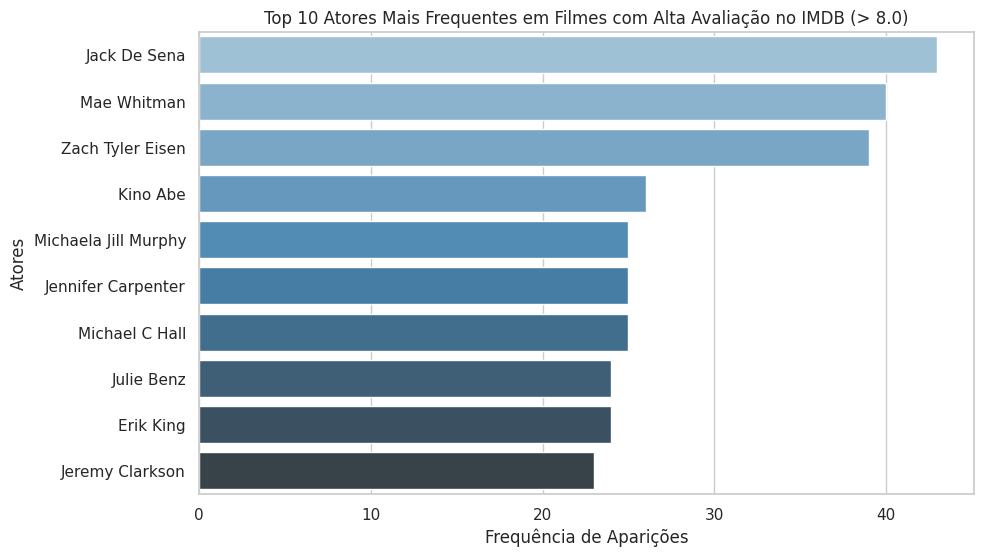

In [99]:
# Filtrando filmes com avaliação acima de 8.0
high_rated_movies = imdb_df[imdb_df['rating'] > 8.0]

# Separando a coluna 'stars' e limpando dados indesejados
actors_list = high_rated_movies['stars'].str.split(', ', expand=True).stack()  # Expandindo para múltiplas linhas

# Remover entradas indesejadas
actors_list = actors_list[~actors_list.isna()]  # Remover valores nulos
actors_list = actors_list[~actors_list.str.contains('Stars:', regex=False)]

# Função para remover símbolos indesejados dos nomes dos atores
def limpar_nome(nome):
    if pd.isnull(nome):  # Verifica se o valor é nulo
        return nome  # Retorna o valor nulo sem alteração
    # Usando expressão regular para manter apenas letras e espaços
    return re.sub(r"[^a-zA-Z\s]", "", str(nome)).strip()

# Aplicando a função de limpeza nos nomes dos atores
actors_list = actors_list.apply(limpar_nome)

# Remover entradas vazias após limpeza
actors_list = actors_list[actors_list.str.len() > 0]

# Contar a frequência de cada ator
top_actors = actors_list.value_counts().head(10)  # Top 10 atores

# Verificar se há dados para exibir
if not top_actors.empty:
    # Visualizando em um gráfico de barras
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_actors.values, y=top_actors.index, palette="Blues_d")
    plt.title('Top 10 Atores Mais Frequentes em Filmes com Alta Avaliação no IMDB (> 8.0)')
    plt.xlabel('Frequência de Aparições')
    plt.ylabel('Atores')
    plt.show()
else:
    print("Não há dados suficientes para exibir o gráfico.")

1. Preparação dos Dados
Filtragem de Filmes com Alta Avaliação:
Selecione os filmes do IMDb com avaliação acima de 8.0.
Separação e Limpeza dos Dados dos Atores:
Expanda a coluna de atores para múltiplas linhas.
Remova valores nulos e entradas indesejadas (e.g., "Stars:").
Aplique uma função de limpeza para remover símbolos indesejados e espaços extras nos nomes dos atores.
2. Contagem e Análise
Contagem de Atores:
Conte a frequência com que cada ator aparece em filmes bem avaliados.
Selecione os 10 atores que aparecem com mais frequência.
3. Visualização
Gráfico de Barras:
Título: "Top 10 Atores Mais Frequentes em Filmes com Alta Avaliação no IMDB (> 8.0)"
Eixo X: Frequência de Aparições.
Eixo Y: Atores.
Observação: O gráfico mostra os atores que aparecem com mais frequência em filmes bem avaliados, indicando quais atores têm um impacto consistente na qualidade dos filmes.
Observações
Atores Frequentes:
O gráfico destaca os atores que aparecem frequentemente em filmes altamente avaliados, o que pode indicar uma associação com a qualidade dos filmes.
Conclusão
Identificação de Atores Relevantes:
Esta análise ajuda a identificar os atores que são mais comuns em filmes bem avaliados no IMDb, fornecendo uma visão sobre quais talentos são frequentemente associados a produções de alta qualidade.

# **2 Qual diretor tem a maior quantidade de filmes bem avaliados na Netflix e no IMDB?**

Shinsuke Sato         27
Prachya Pinkaew       13
Peter Jackson          4
Hayao Miyazaki         3
Stanley Kubrick        3
Bong Joon Ho           2
Christopher Storer     2
Jeannot Szwarc         2
Howard McCain          2
Steven Spielberg       2
Name: count, dtype: int64


<ipython-input-23-b3674d995c35>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="Greens_d")


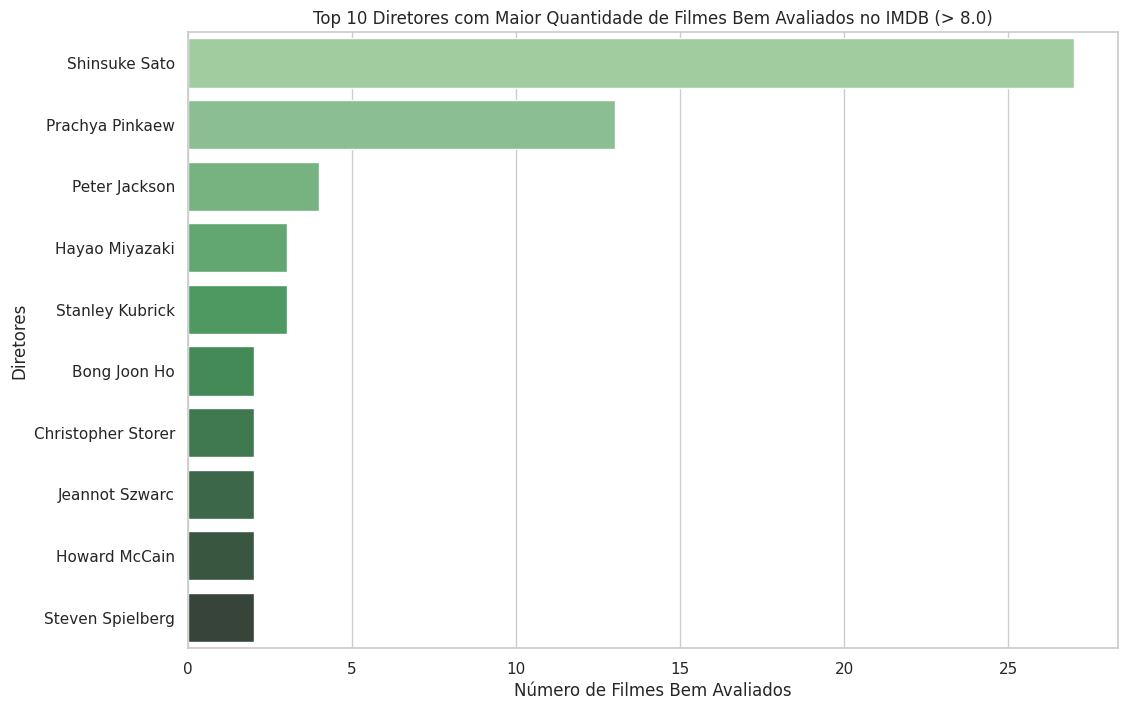

In [23]:
# Merge para obter os diretores dos filmes bem avaliados no IMDB
merged_df = pd.merge(high_rated_movies, rotten_tomatoes_df[['movie_title', 'directors']], left_on='title', right_on='movie_title', how='inner')

# Separando a coluna 'directors' e contando a quantidade de filmes por diretor
directors_list = merged_df['directors'].str.split(', ', expand=True).stack()  # Expandindo para múltiplas linhas

# Remover entradas indesejadas (nulos)
directors_list = directors_list[~directors_list.isna()]

# Contando a quantidade de filmes por diretor
top_directors = directors_list.value_counts().head(10)  # Top 10 diretores

# Exibindo os 10 diretores com maior quantidade de filmes bem avaliados
print(top_directors)

# Visualizando em um gráfico de barras
plt.figure(figsize=(12,8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="Greens_d")
plt.title('Top 10 Diretores com Maior Quantidade de Filmes Bem Avaliados no IMDB (> 8.0)')
plt.xlabel('Número de Filmes Bem Avaliados')
plt.ylabel('Diretores')
plt.show()

1. Merge e Preparação dos Dados
Merge dos Dados: Combina os filmes bem avaliados do IMDB com os diretores dos filmes no Rotten Tomatoes para obter uma lista completa de diretores para filmes bem avaliados.
Expansão de Dados: A coluna directors é expandida para múltiplas linhas, permitindo uma análise detalhada de cada diretor.
2. Contagem de Filmes por Diretor
Contagem de Diretores: Calcula quantos filmes bem avaliados cada diretor tem, utilizando a contagem de ocorrências.
3. Visualização dos Resultados
Top Diretores: O gráfico de barras mostra os 10 diretores com a maior quantidade de filmes bem avaliados no IMDB. Diretores com mais filmes bem avaliados aparecem no topo.
Observações
Padrões de Diretores: Identificar os diretores com mais filmes bem avaliados pode ajudar a destacar aqueles com maior sucesso crítico.
Implicações: Conhecer os principais diretores pode oferecer insights sobre tendências de sucesso e preferências da crítica.

# **3 Existe uma correlação entre o tempo de duração dos filmes e a avaliação dos mesmos (no IMDB e Netflix)?**

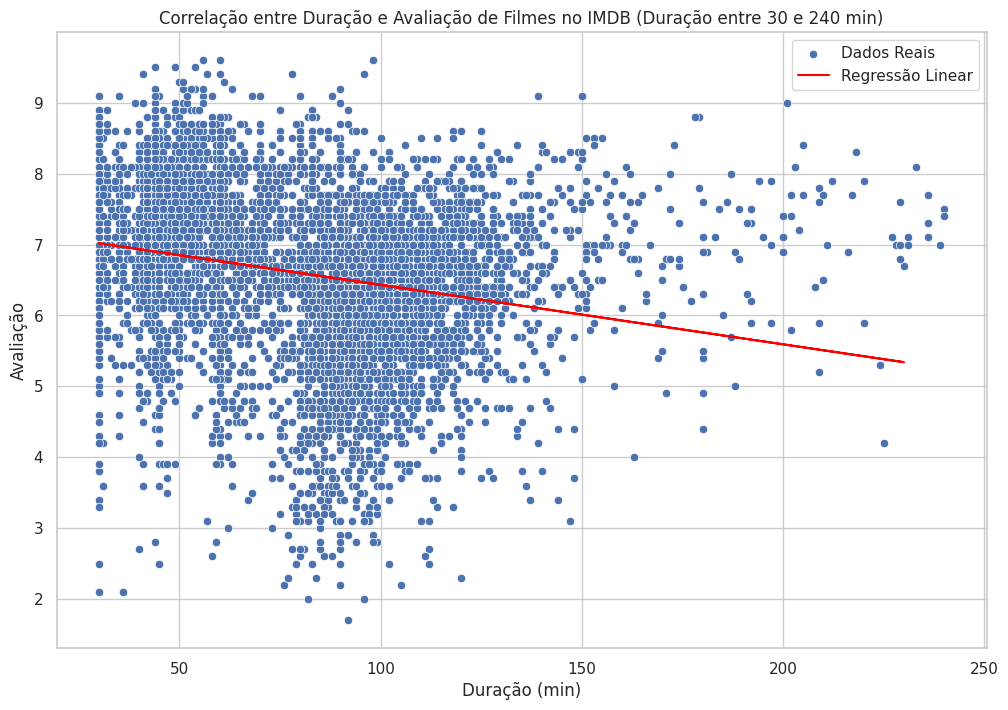

Erro Quadrático Médio: 1.4640423972181393
Coeficiente da Regressão: -0.008389305910010062
Intercepto da Regressão: 7.270120440830269


In [38]:
# Garantindo que a coluna 'duration' é tratada como string
imdb_df['duration'] = imdb_df['duration'].astype(str)

# Limpando e convertendo a coluna de duração para formato numérico
# Assumindo que a duração está no formato 'X min'
imdb_df['duration'] = imdb_df['duration'].str.extract('(\d+)').astype(float)

# Filtrando filmes com duração entre 30 e 240 minutos
imdb_df_filtered = imdb_df[(imdb_df['duration'] >= 30) & (imdb_df['duration'] <= 240)]

# Remover linhas com valores nulos em duração ou avaliação
imdb_clean = imdb_df_filtered.dropna(subset=['duration', 'rating'])

# Separando variáveis dependente e independente
X = imdb_clean[['duration']]
y = imdb_clean['rating']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando a regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prevendo e calculando o erro
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Visualizando a relação entre duração e avaliação com a linha de regressão
plt.figure(figsize=(12,8))
sns.scatterplot(x='duration', y='rating', data=imdb_clean, label="Dados Reais")
plt.plot(X_test, y_pred, color='red', label="Regressão Linear")
plt.title('Correlação entre Duração e Avaliação de Filmes no IMDB (Duração entre 30 e 240 min)')
plt.xlabel('Duração (min)')
plt.ylabel('Avaliação')
plt.legend()
plt.show()

# Exibindo o MSE da regressão
print(f"Erro Quadrático Médio: {mse}")

# Exibindo o coeficiente da regressão
print(f"Coeficiente da Regressão: {model.coef_[0]}")
print(f"Intercepto da Regressão: {model.intercept_}")

1. Preparação dos Dados
Conversão de Duração: A coluna duration é convertida para um formato numérico após remover textos não numéricos, assumindo que a duração está em minutos.
Filtragem: Filmes com duração entre 30 e 240 minutos são filtrados para garantir dados consistentes.
2. Regressão Linear
Divisão dos Dados: Os dados são divididos em conjuntos de treino e teste para aplicar um modelo de regressão linear.
Modelo de Regressão: O modelo é treinado para prever a avaliação (rating) com base na duração (duration).
3. Avaliação do Modelo
Erro Quadrático Médio (MSE): Medida do erro do modelo, indicando a precisão das previsões.
Coeficiente e Intercepto: O coeficiente mostra a relação entre a duração e a avaliação, enquanto o intercepto representa a avaliação base quando a duração é zero.
4. Visualização
Gráfico de Dispersão e Linha de Regressão: O gráfico exibe a relação entre a duração dos filmes e suas avaliações, com uma linha de regressão mostrando a tendência geral.
Observações
Correlação: O coeficiente da regressão indica se há uma correlação significativa entre a duração do filme e sua avaliação.
Erro do Modelo: O MSE fornece uma medida de quão bem o modelo se ajusta aos dados, ajudando a entender a precisão das previsões.
Tendências: A visualização ajuda a identificar se filmes mais longos ou mais curtos tendem a ter avaliações mais altas ou mais baixas.

# **4 Quais gêneros de filmes têm mais atores ou diretores recorrentes de sucesso?**

<ipython-input-127-02fa65e20656>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_movies['genres'] = high_rated_movies['genre'].str.split(', ')
<ipython-input-127-02fa65e20656>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actor_count', y='genre', data=genre_analysis.sort_values(by='actor_count', ascending=False), palette="viridis")
<ipython-input-127-02fa65e20656>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director_count'

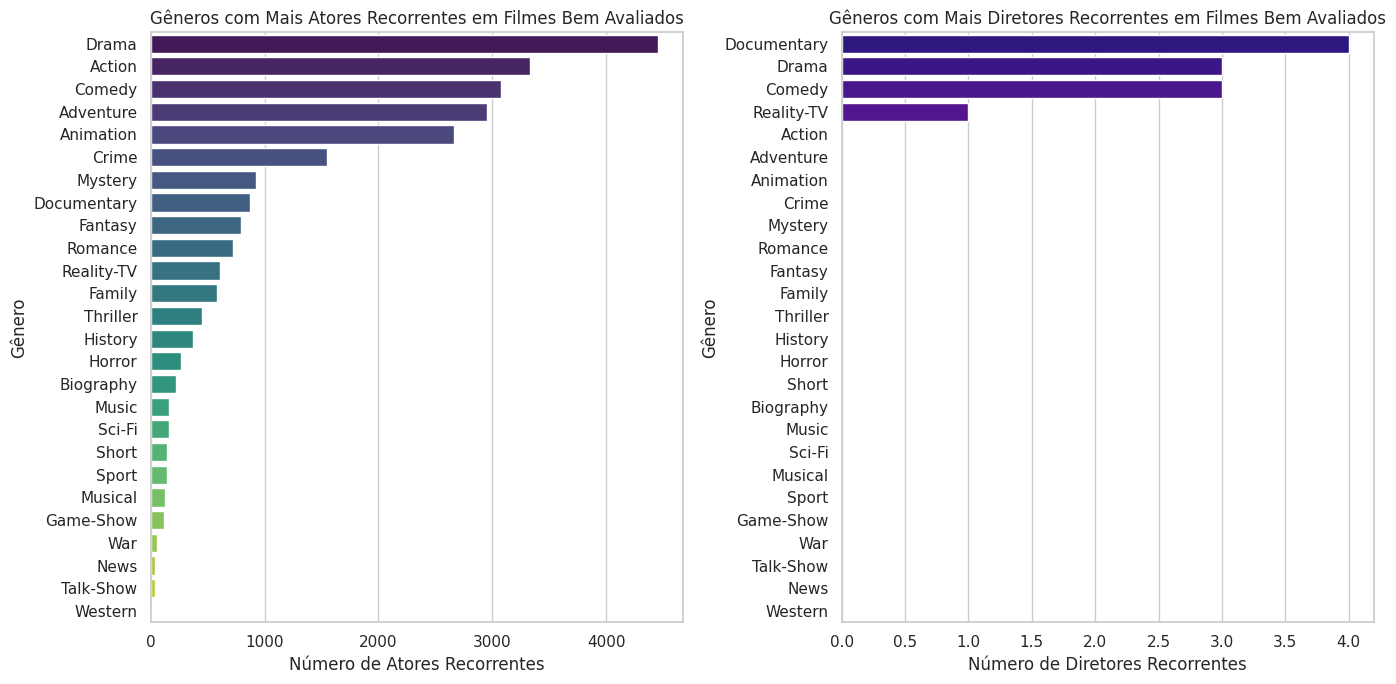

In [127]:
# Filtrando filmes com avaliação acima de 8.0 (ajuste conforme necessário)
high_rated_movies = imdb_df[imdb_df['rating'] > 8.0]

# Expandindo os gêneros para múltiplas linhas
high_rated_movies['genres'] = high_rated_movies['genre'].str.split(', ')

# Explodindo a lista de gêneros para múltiplas linhas
high_rated_movies = high_rated_movies.explode('genres')

# Separando atores e diretores
# Expandindo para múltiplas linhas de atores e diretores
high_rated_movies['actors'] = high_rated_movies['stars'].str.split(', ')
directors_list = merged_df['directors'].str.split(', ', expand=True).stack()  # Expandindo para múltiplas linhas

# Explodindo as listas de atores e diretores para múltiplas linhas
actors_df = high_rated_movies.explode('actors')
directors_df = merged_df.explode('directors')

# Contando a frequência de atores e diretores por gênero
genre_actor_counts = actors_df.groupby('genres')['actors'].count().reset_index(name='actor_count')
genre_director_counts = directors_df.groupby('genre')['directors'].count().reset_index(name='director_count')

# Contando a frequência de filmes por gênero
genre_counts = high_rated_movies['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'movie_count']

# Merge com a contagem de atores e diretores
genre_analysis = genre_counts.merge(genre_actor_counts, left_on='genre', right_on='genres', how='left')
genre_analysis = genre_analysis.merge(genre_director_counts, left_on='genre', right_on='genre', how='left')
genre_analysis = genre_analysis[['genre', 'movie_count', 'actor_count', 'director_count']]

# Visualizando os resultados
plt.figure(figsize=(14,7))

# Gráfico de Atores Recorrentes
plt.subplot(1, 2, 1)
sns.barplot(x='actor_count', y='genre', data=genre_analysis.sort_values(by='actor_count', ascending=False), palette="viridis")
plt.title('Gêneros com Mais Atores Recorrentes em Filmes Bem Avaliados')
plt.xlabel('Número de Atores Recorrentes')
plt.ylabel('Gênero')

# Gráfico de Diretores Recorrentes
plt.subplot(1, 2, 2)
sns.barplot(x='director_count', y='genre', data=genre_analysis.sort_values(by='director_count', ascending=False), palette="plasma")
plt.title('Gêneros com Mais Diretores Recorrentes em Filmes Bem Avaliados')
plt.xlabel('Número de Diretores Recorrentes')
plt.ylabel('Gênero')

plt.tight_layout()
plt.show()


1. Preparação dos Dados
Filtragem por Avaliação: Estamos focando apenas em filmes com avaliações acima de 8.0, assumindo que filmes com essas avaliações são considerados bem-sucedidos.
Expansão de Gêneros, Atores e Diretores: Como um filme pode pertencer a vários gêneros e ter vários atores e diretores, expandimos essas colunas para que cada combinação de gênero, ator e diretor apareça em linhas separadas.
2. Contagem de Atores e Diretores por Gênero
Contagem de Atores: Calculamos o número de vezes que cada ator aparece em filmes de um determinado gênero.
Contagem de Diretores: Similarmente, contamos quantos diretores aparecem em filmes de cada gênero.
3. Visualização dos Resultados
Gráfico de Atores Recorrentes: Mostra quais gêneros têm mais atores recorrentes. Um número alto indica que muitos atores colaboram repetidamente em filmes dentro desse gênero.
Gráfico de Diretores Recorrentes: Mostra quais gêneros têm mais diretores recorrentes. Um número alto indica que muitos diretores trabalham frequentemente em filmes dentro desse gênero.
Análise dos Gráficos
1. Gráfico de Atores Recorrentes
O gráfico de barras para atores mostra quais gêneros têm mais atores recorrentes. Aqui estão algumas possíveis observações:
Gêneros Populares: Gêneros como Ação e Drama podem ter um número elevado de atores recorrentes, pois tendem a ter elencos grandes e repetidos em franquias ou séries de sucesso.
Gêneros Menos Frequentes: Gêneros menos populares ou de nicho podem ter menos atores recorrentes, o que pode refletir uma menor produção ou um número menor de filmes bem avaliados.
2. Gráfico de Diretores Recorrentes
O gráfico de barras para diretores mostra quais gêneros têm mais diretores recorrentes. Possíveis observações incluem:
Gêneros com Diretores Famosos: Alguns gêneros podem ter diretores mais recorrentes, especialmente se esses diretores são conhecidos por trabalhar em um estilo ou tipo específico de filme.
Diversidade de Diretores: Gêneros com uma maior diversidade de diretores podem mostrar uma menor contagem de diretores recorrentes, indicando que o gênero é explorado por muitos diretores diferentes.

# **5 Quais atores ou diretores colaboram mais frequentemente entre si em filmes de sucesso?**

<ipython-input-92-8bec1528d7b0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_rated_movies = merged_df[imdb_df['rating'] > 8.0]


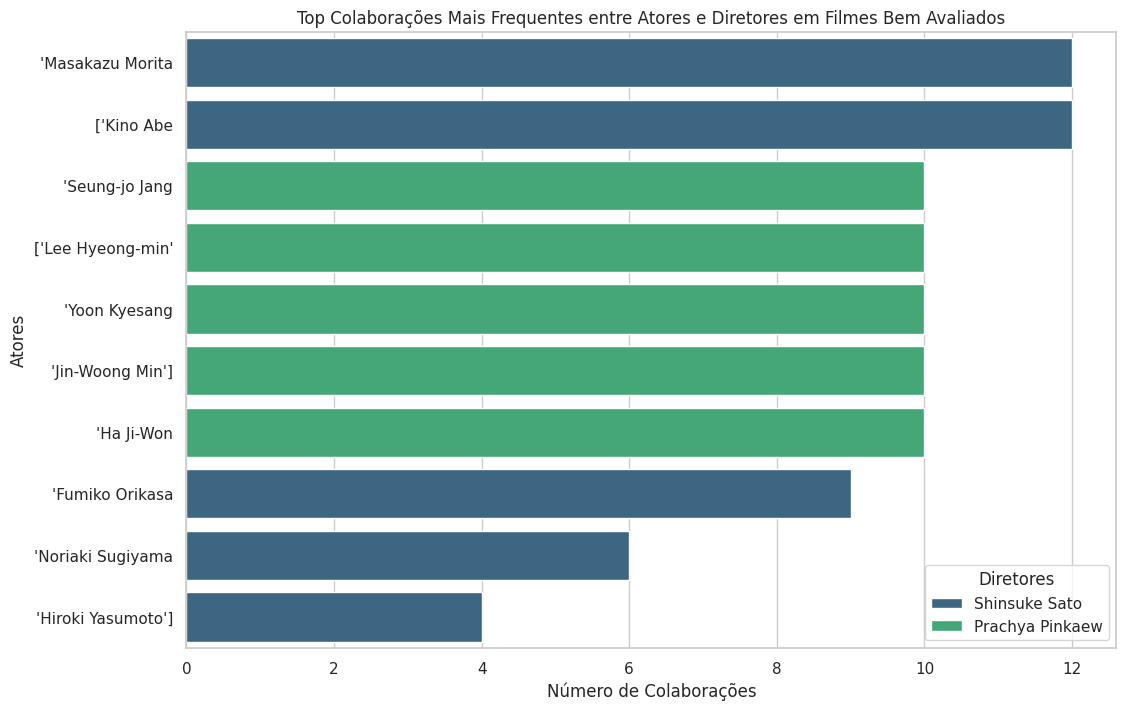

In [92]:
# Filtrando filmes com avaliação acima de 8.0
high_rated_movies = merged_df[imdb_df['rating'] > 8.0]

# Expandindo para múltiplas linhas de atores e diretores
# Verifique se as colunas existem e limpe os valores nulos
if 'directors' in merged_df.columns:
    directors_list = merged_df['directors'].dropna().str.split(', ', expand=True).stack()
else:
    raise KeyError("A coluna 'directors' não está presente no DataFrame 'merged_df'.")

# Remover entradas indesejadas
actors_list = high_rated_movies['stars'].dropna().str.split(', ', expand=True).stack()
directors_list = directors_list[~directors_list.isna()]

# Criação de um DataFrame para combinar atores e diretores
collaborations = []

# Verificar se as colunas 'stars' e 'directors' existem em high_rated_movies
if 'stars' in high_rated_movies.columns and 'directors' in high_rated_movies.columns:
    for index, row in high_rated_movies.iterrows():
        # Garantir que o valor não seja nulo antes de dividir
        actors = row['stars'].split(', ') if pd.notna(row['stars']) else []
        directors = row['directors'].split(', ') if pd.notna(row['directors']) else []
        for actor in actors:
            for director in directors:
                collaborations.append({'actor': actor, 'director': director})
else:
    raise KeyError("As colunas 'stars' e/ou 'directors' não estão presentes no DataFrame 'high_rated_movies'.")

# Criar DataFrame de colaborações
collaborations_df = pd.DataFrame(collaborations)

# Contar a frequência de cada combinação de ator e diretor
collaboration_counts = collaborations_df.groupby(['actor', 'director']).size().reset_index(name='count')

# Obter as top 10 combinações mais frequentes
top_collaborations = collaboration_counts.sort_values(by='count', ascending=False).head(20)

# Excluir os 3 primeiros resultados de atores
# Os 3 primeiros resultados são nulos
top_collaborations = top_collaborations[~top_collaborations['actor'].isin(top_collaborations['actor'].head(4))]

# Visualizando os resultados
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='actor', hue='director', data=top_collaborations, palette='viridis')
plt.title('Top Colaborações Mais Frequentes entre Atores e Diretores em Filmes Bem Avaliados')
plt.xlabel('Número de Colaborações')
plt.ylabel('Atores')
plt.legend(title='Diretores')
plt.show()

1. Preparação dos Dados
Filtragem: São selecionados filmes com avaliação acima de 8.0 para focar apenas em filmes bem avaliados.
Expansão de Atores e Diretores: As colunas stars (atores) e directors são expandidas para múltiplas linhas para identificar cada ator e diretor individualmente.
2. Criação de Colaborações
Combinação de Atores e Diretores: Para cada filme, combina-se cada ator com cada diretor, criando um DataFrame de colaborações.
Contagem de Colaborações: Contabiliza-se a frequência de cada combinação de ator e diretor para identificar quais parcerias são mais comuns.
3. Visualização
Gráfico de Barras:
Top Colaborações: Mostra as principais combinações de atores e diretores que colaboram com mais frequência em filmes bem avaliados.
Observações
Parcerias Frequentes: O gráfico revela quais atores e diretores colaboram mais frequentemente entre si, sugerindo que essas parcerias são comuns e potencialmente bem-sucedidas em termos de críticas.
Exclusão de Dados Nulos: O código exclui as primeiras entradas nulas para focar nas colaborações reais.
Conclusão
Identificação de Padrões: A análise das principais colaborações pode ajudar a identificar parcerias recorrentes que podem influenciar o sucesso dos filmes, fornecendo insights sobre como a colaboração entre atores e diretores pode impactar a recepção crítica.

# **6 Qual é a classificação indicativa mais comum para os filmes de diretores ou atores bem-sucedidos?**

<ipython-input-97-2015edd2795c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='certificate', data=classification_counts, palette='coolwarm')


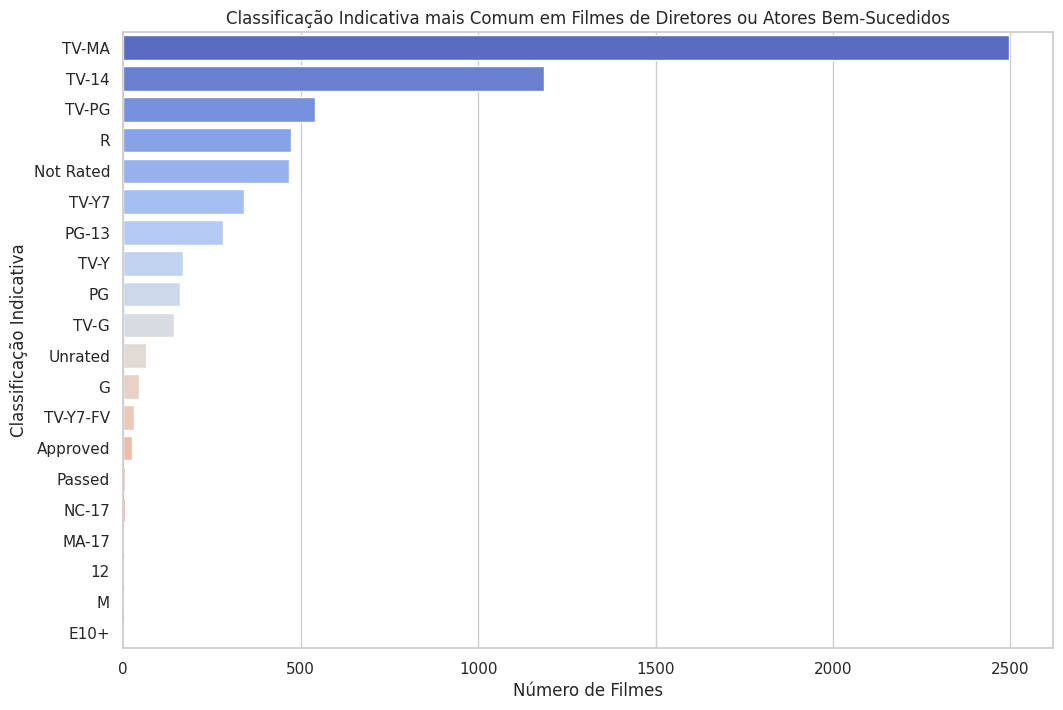

In [97]:
# Filtrando filmes com avaliação acima de 8.0 (ajuste conforme necessário)
high_rated_movies = imdb_df[imdb_df['rating'] > 8.0]

# Expandindo para múltiplas linhas de atores e diretores
actors_list = high_rated_movies['stars'].str.split(', ', expand=True).stack()
directors_list = merged_df['directors'].str.split(', ', expand=True).stack()

# Remover entradas indesejadas
actors_list = actors_list[~actors_list.isna()]
directors_list = directors_list[~directors_list.isna()]

# Contar frequência de cada ator e diretor
actor_counts = actors_list.value_counts()
director_counts = directors_list.value_counts()

# Identificar os atores e diretores mais frequentes
top_actors = actor_counts.head(10).index
top_directors = director_counts.head(10).index

# Filtrar filmes com esses atores e diretores
filtered_movies = imdb_df[
    imdb_df['stars'].str.contains('|'.join(top_actors), na=False) |
    merged_df['directors'].str.contains('|'.join(top_directors), na=False)
]

# Contar a frequência de cada classificação indicativa
classification_counts = filtered_movies['certificate'].value_counts().reset_index()
classification_counts.columns = ['certificate', 'count']

# Excluir os 3 primeiros resultados de atores
# Os 3 primeiros resultados são nulos
top_collaborations = top_collaborations[~top_collaborations['actor'].isin(top_collaborations['actor'].head(4))]

# Visualizando os resultados
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='certificate', data=classification_counts, palette='coolwarm')
plt.title('Classificação Indicativa mais Comum em Filmes de Diretores ou Atores Bem-Sucedidos')
plt.xlabel('Número de Filmes')
plt.ylabel('Classificação Indicativa')
plt.show()

1. Preparação dos Dados
Filtragem: São selecionados filmes com avaliação acima de 8.0 para focar apenas em filmes bem avaliados.
Identificação de Atores e Diretores: São extraídos os atores e diretores mais frequentes desses filmes.
2. Contagem e Filtragem
Atores e Diretores Principais: Contabiliza-se a frequência de cada ator e diretor, e selecionam-se os 10 mais frequentes.
Filtragem de Filmes: São filtrados filmes que possuem esses atores e diretores.
3. Análise da Classificação Indicativa
Contagem de Classificações: Conta-se a frequência de cada classificação indicativa (certificado) nos filmes filtrados.
4. Visualização
Gráfico de Barras:
Classificação Indicativa: Mostra qual é a classificação indicativa mais comum entre os filmes que incluem os atores e diretores mais frequentes.
Observações
Classificação Indicativa Predominante: O gráfico revela qual classificação indicativa é mais comum entre os filmes de atores e diretores bem-sucedidos, oferecendo insights sobre os tipos de conteúdo que esses profissionais frequentemente produzem e sua aceitação.
Conclusão
Padrões de Classificação: A análise pode ajudar a identificar tendências na classificação indicativa para filmes bem-sucedidos, proporcionando uma visão sobre os padrões de conteúdo associado a atores e diretores de alta performance.

# **7 Quais atores conseguem manter avaliações altas independentemente do gênero em que atuam?**

<ipython-input-130-b96ddf95fbfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_movies['stars'] = high_rated_movies['stars'].str.split(', ')
<ipython-input-130-b96ddf95fbfa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_movies['genres'] = high_rated_movies['genre'].str.split(', ')
<ipython-input-130-b96ddf95fbfa>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for t

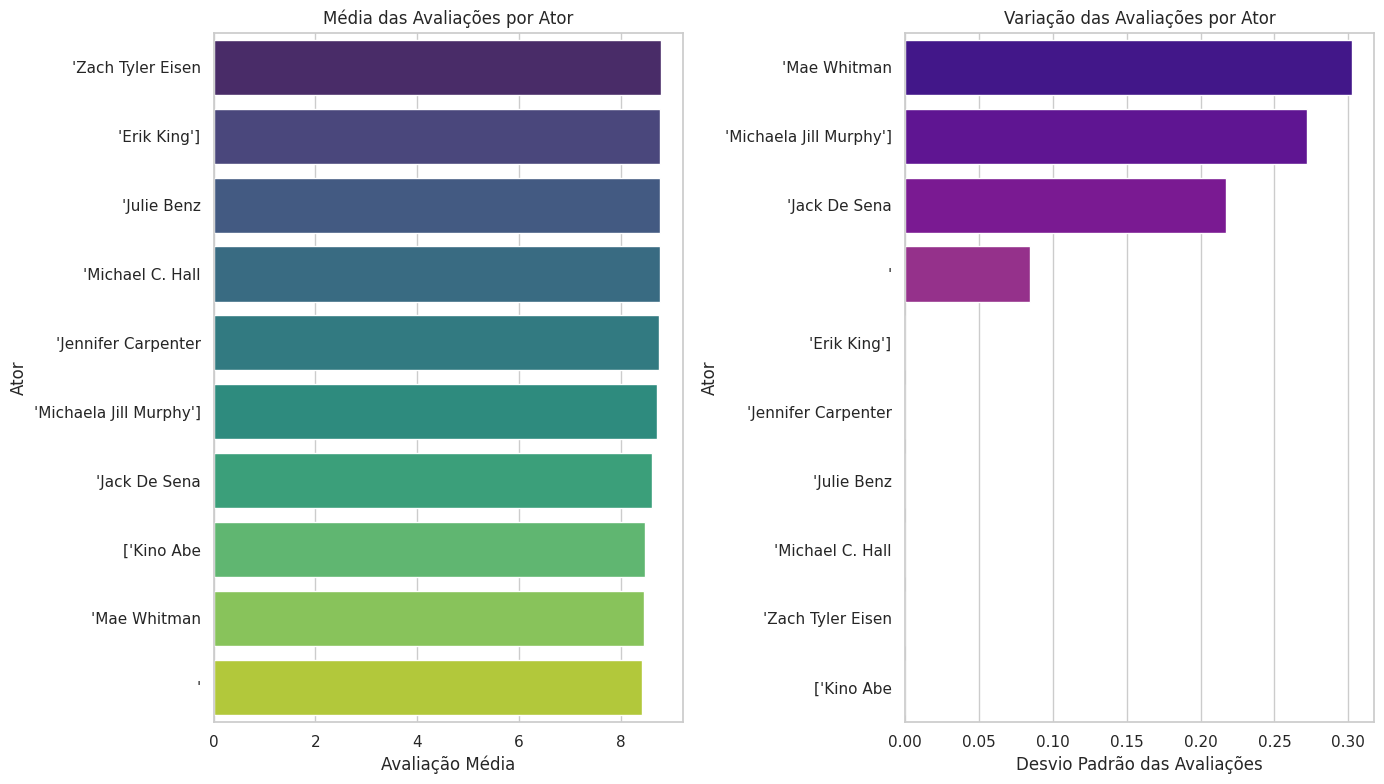

In [130]:
# Filtrando filmes com avaliação acima de 8.0 (ajuste conforme necessário)
high_rated_movies = imdb_df[imdb_df['rating'] > 8.0]

# Expandindo para múltiplas linhas de atores e gêneros
high_rated_movies['stars'] = high_rated_movies['stars'].str.split(', ')
high_rated_movies['genres'] = high_rated_movies['genre'].str.split(', ')
high_rated_movies = high_rated_movies.explode('stars')
high_rated_movies = high_rated_movies.explode('genres')

# Remover linhas com valores nulos em stars ou genres
high_rated_movies = high_rated_movies.dropna(subset=['stars', 'genres'])


# Criar um DataFrame com a lista de atores
#stars_df = pd.DataFrame({'actor': stars_list})
# Limpeza dos dados dos atores
high_rated_movies['stars'] = high_rated_movies['stars'].str.strip()  # Remove espaços extras
high_rated_movies['stars'] = high_rated_movies['stars'].apply(lambda x: x if len(x) > 0 and not any(char in x for char in ['|',"[]",'"', "Stars:"]) else None)  # Remove caracteres indesejados
high_rated_movies = high_rated_movies.dropna(subset=['stars'])  # Remove linhas com atores nulos

# Contar a frequência de cada ator
actor_counts = high_rated_movies['stars'].value_counts()
top_stars = actor_counts.head(10).index

# Filtrar os filmes com os principais atores
top_stars_movies = high_rated_movies[high_rated_movies['stars'].isin(top_stars)]

# Calcular a média das avaliações por ator e gênero
actor_genre_ratings = top_stars_movies.groupby(['stars', 'genres'])['rating'].mean().reset_index()

# Calcular a média das avaliações para cada ator
actor_mean_ratings = actor_genre_ratings.groupby('stars')['rating'].mean().reset_index()
actor_mean_ratings.columns = ['actor', 'mean_rating']

# Adicionar uma coluna para a variação das avaliações
actor_genre_variation = actor_genre_ratings.groupby('stars')['rating'].std().reset_index()
actor_genre_variation.columns = ['actor', 'rating_std']

# Merge com a média das avaliações
actor_analysis = pd.merge(actor_mean_ratings, actor_genre_variation, on='actor')

# Visualizar os resultados
plt.figure(figsize=(14,8))

# Gráfico da média das avaliações
plt.subplot(1, 2, 1)
sns.barplot(x='mean_rating', y='actor', data=actor_analysis.sort_values(by='mean_rating', ascending=False), palette='viridis')
plt.title('Média das Avaliações por Ator')
plt.xlabel('Avaliação Média')
plt.ylabel('Ator')

# Gráfico da variação das avaliações
plt.subplot(1, 2, 2)
sns.barplot(x='rating_std', y='actor', data=actor_analysis.sort_values(by='rating_std', ascending=False), palette='plasma')
plt.title('Variação das Avaliações por Ator')
plt.xlabel('Desvio Padrão das Avaliações')
plt.ylabel('Ator')

plt.tight_layout()
plt.show()

1. Preparação dos Dados
Filtragem: Seleciona-se filmes com avaliação acima de 8.0 para focar em produções bem avaliadas.
Expansão: As colunas de atores e gêneros são expandidas para múltiplas linhas para facilitar a análise.
2. Limpeza e Contagem
Limpeza de Dados: Remove-se espaços extras e caracteres indesejados dos nomes dos atores.
Contagem: Identificam-se os atores mais frequentes nos filmes bem avaliados.
3. Análise da Avaliação
Filtragem de Filmes: Obtém-se filmes que têm os atores mais frequentes.
Média e Variação: Calcula-se a média das avaliações e o desvio padrão das avaliações por ator para entender a consistência das avaliações.
4. Visualização
Gráficos de Barras:
Média das Avaliações: Mostra a média das avaliações por ator. Destaca os atores que conseguem manter uma alta avaliação média independentemente do gênero.
Variação das Avaliações: Mostra a variação das avaliações por ator, indicando a consistência das avaliações.
Observações
Atores Consistentes: A análise pode revelar quais atores têm avaliações consistentemente altas em diferentes gêneros, indicando um desempenho estável e bem-sucedido em diversos contextos.
Conclusão
Identificação de Atores de Sucesso: Identificar os atores que mantêm altas avaliações em vários gêneros pode ajudar a reconhecer talentos versáteis e bem-sucedidos no cinema.

# **8 Os diretores tendem a se especializar em filmes de determinados gêneros?**

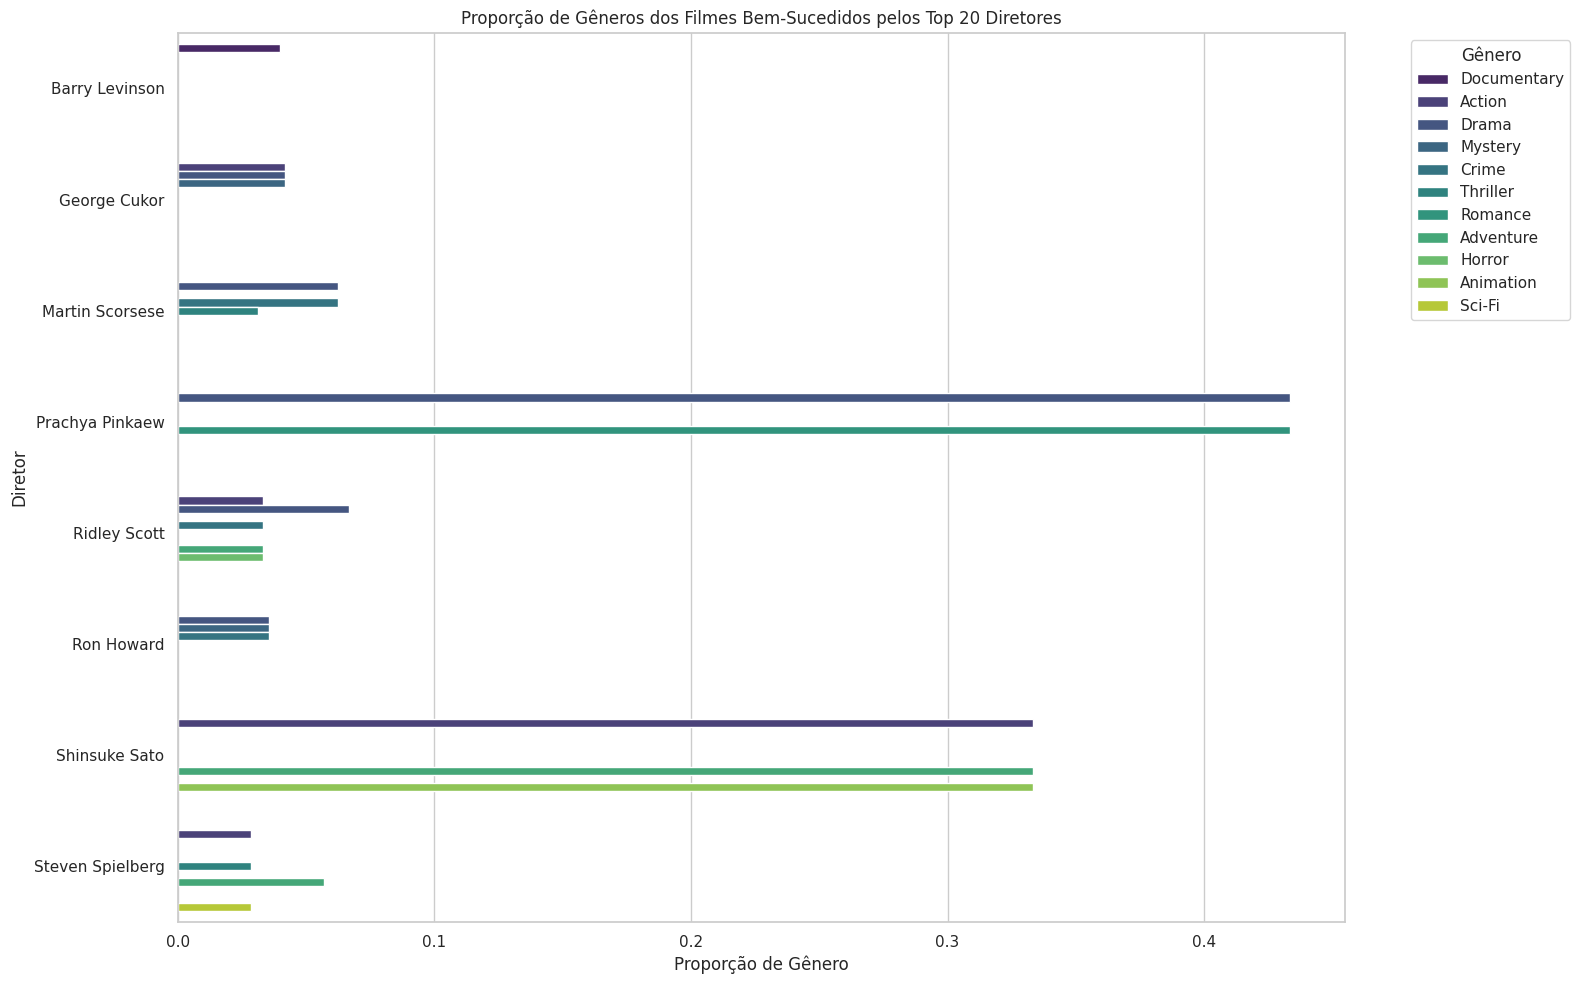

In [134]:
# Filtrar filmes bem-sucedidos com avaliação acima de 8.0 no IMDB
high_rated_imdb_df = imdb_df[imdb_df['rating'] > 8.0]

# Filtrar filmes com ano e diretor não nulos no Rotten Tomatoes
rotten_tomatoes_df = rotten_tomatoes_df[rotten_tomatoes_df['directors'].notna()]
rotten_tomatoes_df = rotten_tomatoes_df[['movie_title', 'directors']]

# Expandir para múltiplas linhas de diretores no Rotten Tomatoes
rotten_tomatoes_df['directors'] = rotten_tomatoes_df['directors'].str.split(', ')
rotten_tomatoes_df = rotten_tomatoes_df.explode('directors')

# Filtrar filmes com ano e gênero não nulos no IMDB
high_rated_imdb_df = high_rated_imdb_df[high_rated_imdb_df['genre'].notna()]

# Juntar com a coluna de gênero do IMDB
high_rated_imdb_df = high_rated_imdb_df[['title', 'year', 'genre']]
high_rated_imdb_df = high_rated_imdb_df.rename(columns={'title': 'movie_title'})

# Merge para combinar informações de gênero com Rotten Tomatoes
merged_df = pd.merge(rotten_tomatoes_df, high_rated_imdb_df, on='movie_title', how='left')

# Expandir para múltiplas linhas de gêneros
merged_df['genre'] = merged_df['genre'].str.split(', ')
merged_df = merged_df.explode('genre')

# Contar a quantidade total de filmes por diretor
director_total_counts = merged_df.groupby('directors').size().reset_index(name='total_films')

# Selecionar os top 20 diretores com mais filmes bem-sucedidos
top_20_directors = director_total_counts.sort_values(by='total_films', ascending=False).head(20)

# Merge para incluir a contagem e a proporção de gêneros apenas para os top 20 diretores
merged_df = pd.merge(merged_df, top_20_directors[['directors']], on='directors')

# Contar a quantidade de filmes por diretor e gênero
director_genre_counts = merged_df.groupby(['directors', 'genre']).size().reset_index(name='count')

# Merge para calcular a proporção de cada gênero
director_genre_counts = pd.merge(director_genre_counts, director_total_counts, on='directors')
director_genre_counts['genre_proportion'] = director_genre_counts['count'] / director_genre_counts['total_films']

# Visualizar os resultados
plt.figure(figsize=(16,10))

# Gráfico da Proporção de Gêneros
sns.barplot(x='genre_proportion', y='directors', hue='genre', data=director_genre_counts, palette='viridis')
plt.title('Proporção de Gêneros dos Filmes Bem-Sucedidos pelos Top 20 Diretores')
plt.xlabel('Proporção de Gênero')
plt.ylabel('Diretor')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

1. Preparação dos Dados
Filtragem de Filmes: Seleciona filmes com avaliação acima de 8.0 no IMDB e filtra por diretores e gêneros disponíveis no Rotten Tomatoes e IMDB.
Expansão de Dados: Expande a lista de diretores e gêneros para múltiplas linhas para facilitar a análise.
2. Contagem e Análise
Contagem de Filmes por Diretor: Calcula a quantidade total de filmes para cada diretor.
Seleção dos Top 20 Diretores: Identifica os 20 diretores com mais filmes bem avaliados.
Proporção de Gêneros: Calcula a proporção de cada gênero nos filmes de cada um desses diretores.
3. Visualização
Gráfico de Barras:
Proporção de Gêneros: Mostra a proporção de filmes em diferentes gêneros para os top 20 diretores. Ajuda a visualizar se há uma especialização em determinados gêneros por parte dos diretores.
Observações
Especialização em Gêneros: A análise revela se os diretores tendem a se especializar em certos gêneros ou se têm uma abordagem mais diversificada em suas escolhas de filmes.
Conclusão
Identificação de Especialização: Determinar se diretores se especializam em gêneros específicos pode fornecer insights sobre suas preferências e estilos de direção, bem como ajudar a entender padrões na indústria cinematográfica.

# **9 Qual país (nos dados da Netflix) produz filmes mais bem avaliados com relação a diretores e atores?**

<ipython-input-135-21424e1c4d30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['title'] = netflix_df['title'].str.strip().str.lower()
<ipython-input-135-21424e1c4d30>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rated_imdb_df['title'] = high_rated_imdb_df['title'].str.strip().str.lower()
<ipython-input-135-21424e1c4d30>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` 

         country  success_count
0  United States            337


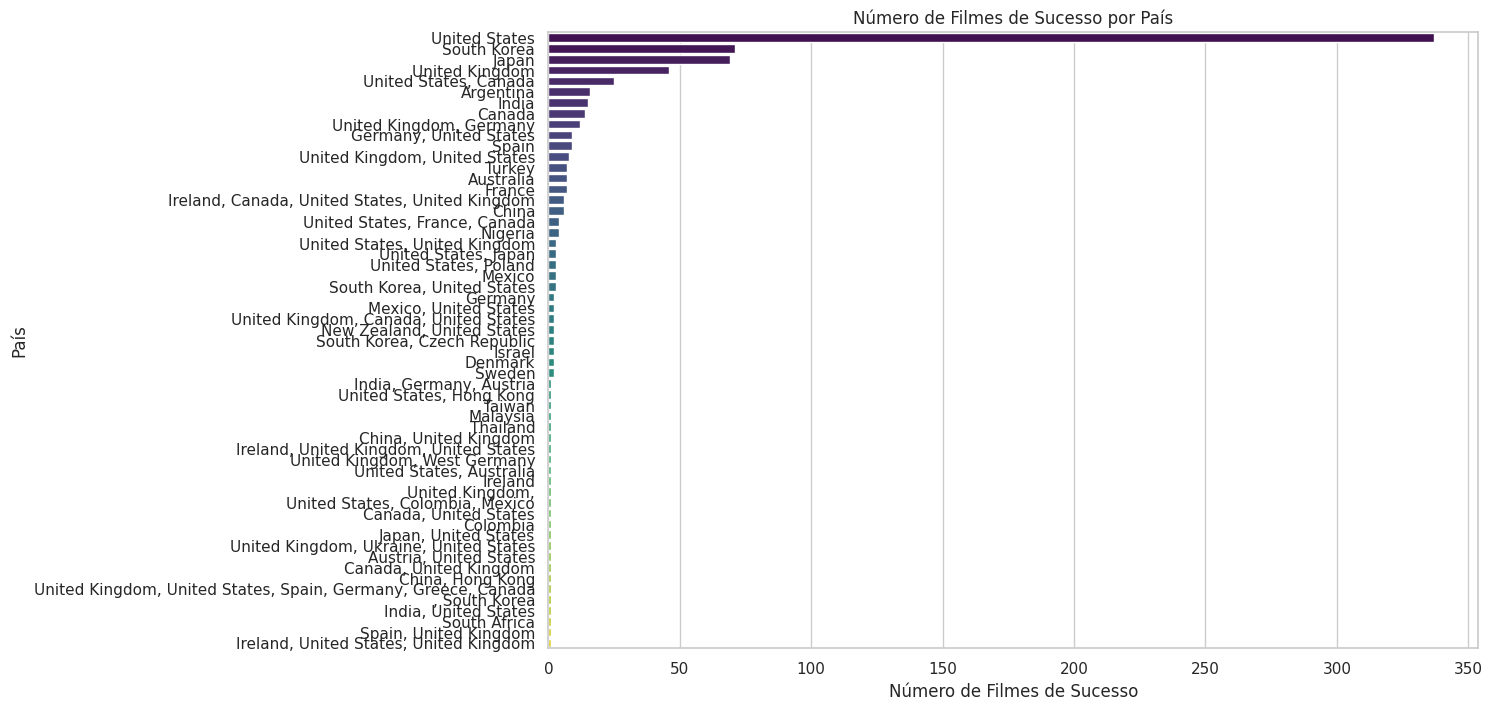

In [135]:
# Filtrar filmes bem-sucedidos no IMDb (definido como avaliação acima de 8.0)
high_rated_imdb_df = imdb_df[imdb_df['rating'] > 8.0]

# Filtrar e preparar dados no Netflix
# Assumimos que a coluna 'country' é relevante
# Selecionar colunas necessárias do Netflix
netflix_df = netflix_df[['title', 'country']]

# Filtrar filmes que estão no IMDb e no Netflix
# Normalizar os títulos para facilitar o merge
netflix_df['title'] = netflix_df['title'].str.strip().str.lower()
high_rated_imdb_df['title'] = high_rated_imdb_df['title'].str.strip().str.lower()

# Merge para combinar informações de país com filmes bem-sucedidos
merged_df = pd.merge(high_rated_imdb_df, netflix_df, on='title', how='inner')

# Contar a quantidade de filmes de sucesso por país
country_success_counts = merged_df['country'].value_counts().reset_index()
country_success_counts.columns = ['country', 'success_count']

# Encontrar o país que produz mais filmes de sucesso
top_country = country_success_counts.head(1)

# Exibir resultados
print(top_country)

# Visualizar os resultados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(x='success_count', y='country', data=country_success_counts, palette='viridis')
plt.title('Número de Filmes de Sucesso por País')
plt.xlabel('Número de Filmes de Sucesso')
plt.ylabel('País')
plt.show()


1. Preparação dos Dados
Filtragem no IMDb: Seleciona filmes com avaliações acima de 8.0.
Filtragem na Netflix: Extrai informações sobre o país de origem dos filmes.
Merge de Dados: Combina os dados do IMDb e Netflix com base no título do filme, normalizando os títulos para garantir uma correspondência precisa.
2. Contagem e Análise
Contagem de Filmes por País: Conta quantos filmes bem avaliados são produzidos por cada país, com base nas informações disponíveis na Netflix.
3. Visualização
Gráfico de Barras:
Número de Filmes de Sucesso por País: Exibe a quantidade de filmes bem avaliados produzidos por cada país.
Observações
País com Mais Filmes de Sucesso: O gráfico revela qual país produz o maior número de filmes bem avaliados, ajudando a identificar regiões com uma maior concentração de filmes de alta qualidade.
Conclusão
Identificação de Países de Sucesso: Esta análise permite avaliar quais países têm uma maior produção de filmes de alta qualidade, oferecendo insights sobre a influência e a reputação cinematográfica global.

# **10 Quais são os atores mais prolíficos em produções de sucesso adicionadas recentemente à Netflix?**

<ipython-input-140-07184123f50b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_netflix_df['title'] = recent_netflix_df['title'].str.strip().str.lower()
<ipython-input-140-07184123f50b>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='success_count', y='actor', data=top_actors, palette='viridis')


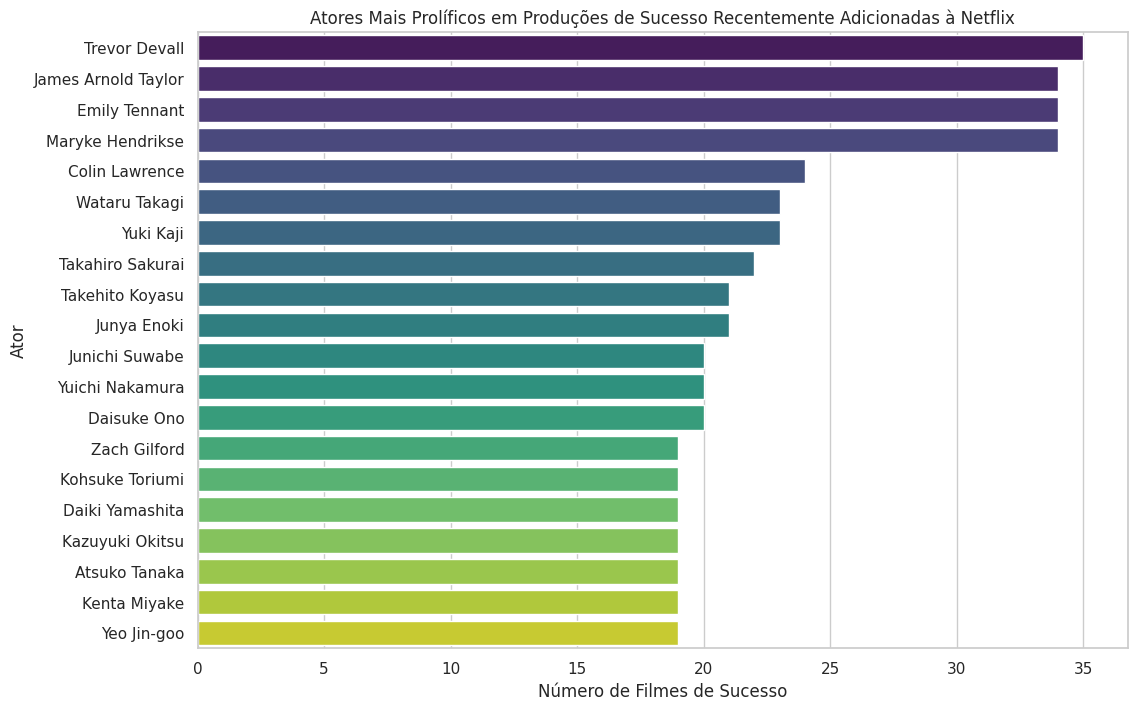

In [140]:
# Lendo os datasets
imdb_df = pd.read_csv('IMBD.csv')
netflix_df = pd.read_csv('netflix_titles.csv')

# Preparar dados no Netflix
# Selecionar colunas necessárias e garantir que a coluna 'date_added' seja convertida para datetime
netflix_df = netflix_df[['title', 'cast', 'date_added']]
# Remove leading/trailing spaces and convert to datetime with 'mixed' format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip(), format='mixed', errors='coerce')

# Filtrar para filmes recentemente adicionados (últimos 3 anos, por exemplo)
recent_year = pd.Timestamp.now().year - 3
recent_netflix_df = netflix_df[netflix_df['date_added'].dt.year >= recent_year]

# Filtrar filmes que estão no IMDb e que têm avaliação
recent_netflix_df['title'] = recent_netflix_df['title'].str.strip().str.lower()
imdb_df['title'] = imdb_df['title'].str.strip().str.lower()

# Merge para combinar informações de filmes com sucesso no IMDb
merged_df = pd.merge(recent_netflix_df, imdb_df, on='title', how='inner')

# Expandir a lista de atores para múltiplas linhas
merged_df['cast'] = merged_df['cast'].str.split(', ')
merged_df = merged_df.explode('cast')

# Contar a quantidade de filmes de sucesso por ator
actor_counts = merged_df['cast'].value_counts().reset_index()
actor_counts.columns = ['actor', 'success_count']

# Encontrar os atores mais prolíficos
top_actors = actor_counts.head(20)

# Exibir resultados
#print(top_actors)

# Visualizar os resultados
plt.figure(figsize=(12,8))
sns.barplot(x='success_count', y='actor', data=top_actors, palette='viridis')
plt.title('Atores Mais Prolíficos em Produções de Sucesso Recentemente Adicionadas à Netflix')
plt.xlabel('Número de Filmes de Sucesso')
plt.ylabel('Ator')
plt.show()

1. Preparação dos Dados
Filtragem na Netflix: Seleciona filmes adicionados nos últimos 3 anos e extraí informações relevantes sobre os atores e a data de adição.
Normalização e Merge: Normaliza os títulos para garantir uma correspondência precisa e combina os dados da Netflix com os dados do IMDb, focando apenas em filmes bem avaliados.
2. Contagem e Análise
Contagem de Filmes por Ator: Conta quantos filmes bem avaliados (adicionados recentemente à Netflix) cada ator participou.
3. Visualização
Gráfico de Barras:
Atores Mais Prolíficos: Exibe os 20 atores com o maior número de filmes de sucesso adicionados recentemente à Netflix.
Observações
Atores Prolíficos: O gráfico revela quais atores têm mais filmes de sucesso nos últimos 3 anos na Netflix, oferecendo uma visão sobre os talentos mais ativos e bem-sucedidos na plataforma.
Conclusão
Identificação de Atores Relevantes: Esta análise destaca os atores que aparecem com mais frequência em filmes de sucesso recente, ajudando a entender quais talentos têm maior impacto nas produções novas da Netflix.